## Multiple Linear Regression

 ##### Connect to internet and import pandas,numpy,matplotlib,scikit-learn,seaborn. 

In [2]:
# Step-0: Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
# Step1: Fetching the dataset (from sklearn.datasets). 
california=fetch_california_housing() #Error: URLError: <urlopen error [Errno 11001] getaddrinfo failed>. 
                                      # If not connected to network. 

In [5]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [6]:

california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8))

In [9]:
california.target_names

['MedHouseVal']

In [10]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [11]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [12]:
# Step-2: Read the dataset(from california.data).  
## Lets prepare the dataset
dataset=pd.DataFrame(california.data,columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
dataset['Price']=california.target

In [14]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
# Step-3: EDA-Exploratory Data Analysis. 
dataset.info() # Check the data types and non-null counts
          # output: # 1.Index Range-> RangeIndex: 10000 entries, 0 to 9999
                    # 2.Columns-> 3 columns: 'Index', 'Height', 'Weight'
                    # 3.Non-Null Count-> 'Index'-> 10000 non-null, 'Height'-> 10000 non-null, 'Weight'-> 10000 non-null
                    # 4.Dtype-> 'Index'-> int64, 'Height'-> float64, 'Weight'-> float64
                    # 5.Memory Usage->How much memory dataframe takes in bytes-> 500.0 KB 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [16]:
dataset.describe()# Get summary statistics
              # This function gives descriptive statistics(mean, std, min, 25%, 50%, 75%, max) for numerical columns in the dataframe. 
              # Defaultly, it includes only numerical columns(int,float).
              # If you use df.describe(incude="all") -> it also includes non-numeric columns(object,category,bool). 
              # For numeric columns: (count,mean,std,min,25%,50%,75%,max)
              # For object columns/non-numeric column(when include ="all"): (count,unique,top,freq)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
dataset.isnull().sum() # Check for missing values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [18]:
dataset.corr() #Is used to find the correlation b/w numerical columns in a Dataframe. 
               #Creates the correlation matrix (only numerical columns). 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

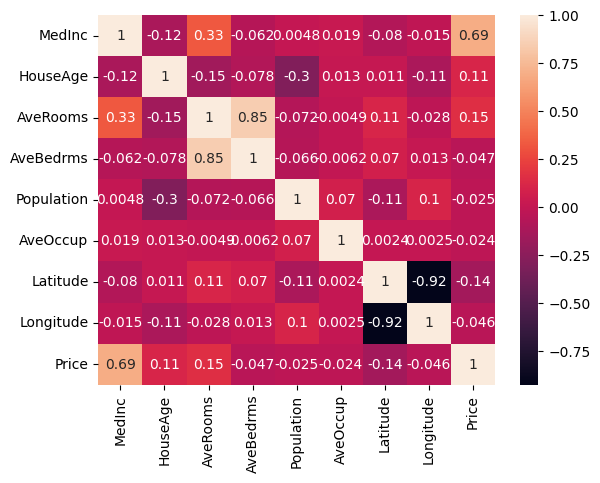

In [19]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True) 
# Plots the matrix as a colored grid 
# annod=True -> Displays the actual correlation values inside each cell. 
# if cmap="coolwarm" -> Colors (blue for negative, red for positive). 

# OUTPUT's:
  # Dark red: strong positive correlation. 
  # Dark blue: strong negative correlation. 
  # Near white: weak/no correlation. 

In [20]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
# Step-3: Divide our dataset into independent and dependent features. 
## independent and dependent features
X=dataset.iloc[:,:-1] ##independent features
y=dataset.iloc[:,-1] ##dependent feature

In [22]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [24]:
# Step-4: TRAIN-TEST split.
from sklearn.model_selection import train_test_split
# Training set: used to train(fit) the model.
# Test set -> used to evaluate the model's performance on unseen data.  

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)
# test_size=0.20 -> 20% of the data goes into the test set, 80% into the train set. 
# random_state =42 -> ensures reproducibilty ( so you get the same split every time). 


In [25]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape
#X_train.shape,X_test.shape # (n_samples,n_features).
#y_train.shape,y_test.shape # (n_samples,)

((13828, 8), (13828,), (6812, 8), (6812,))

In [26]:
# Step-5: Standardization. 
# Standardization means rescaling your features so that they have: mean=0, standard deviation = 1. 
# This helps models (like logistic Regression,SVM,Neural Nets,KMeans,PCA,etc.) converge faster and treat all features on the same scale. 

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() # Now you have a scaler object that you can use to fit and transform your data. 
# Fit ONLY on training data(scaler.fit(x_train))-> prevents data leakage from the test set. 
# Transform both Train & Test using the same scaler.  
# After standardization: 
      # x_train_scaled.mean() = 0
      # x_train_scaled.std()=1   

X_train_scaled=scaler.fit_transform(X_train)
# fit() -> learns the mean & std from the training data. 
# transform() -> applies (x-mean)/std.  #scaling.
# Fit_transform -> does both in one step ( Use ONLY on training data). 

X_test_scaled=scaler.transform(X_test)
# it applies the scaling (or other preprocessing) using parameters(mean,std) learned during .fit() 
# For, StandardScaler, it uses the mean and std that were learned from the training data.    
# formula applied: x_scaled = (x-mean)/std   .

In [27]:
X_train_scaled  #scaled

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]], shape=(13828, 8))

In [28]:
X_test_scaled  #scaled

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]], shape=(6812, 8))

 ### plt.scatter(X_train_scaled,y_train) -> error
 ##### The error comes because plt.scatter(x_train,y_train) expects 1D arrays(x vs y), but in multiple linear regression your x_train has many columns(features) -> it's a 2D array. 

 ##### Why error?
 --> plt.scatter(x,y) -> requires:
     -> x : 1D array(like one feature/column)
     -> y : 1D array (target values)

But x_train is 2D -> multiple columns -> matplotlib doesn't know which column to use. 

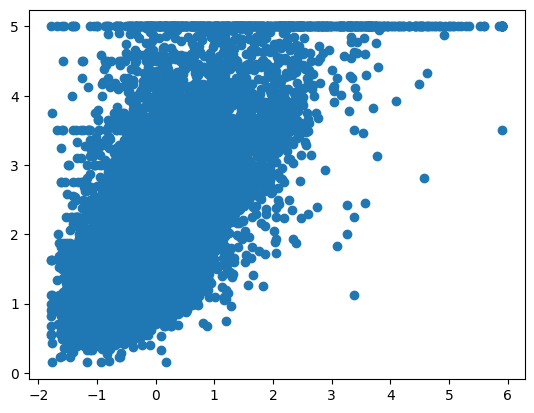

In [32]:
plt.scatter(X_train_scaled[:,0],y_train) #--> #1.Visualize relationships b/w i/p & o/p. #2. Check linearity #3.DEtect outliers. 
# It plots the training data points with:
  # -> X_train on the x-axis(features). 
  # -> y_train on the y-axis(target variable/labels). 
# If x_train has multiple features (2D array), you can ONLY scatter plot one feature vs y at a time. 
# eg: plt.scatter(x_train[:,0],y_train) to plot feature 0 against target. 

## Model Training

In [33]:
# Step-6: Model Training
from sklearn.linear_model import LinearRegression
# LinearRegression ia a class in scikit-learn that implements ordinary least squares(OLS) regression. 
# It finds the best-fitting line(or hyperplane) that minimizes the sum of squared errors b/w predicted and actual values. 


In [34]:
regression=LinearRegression()# Create a FRESH linear regression model with default settings. 
# Why the parentheses () ?
  # -> LinearRegression(without ()) is just the class definition.
  # ->LinearRegression(with()) calls the constructor -> creates a new object/instance you can use (here we call it model). 
# Default settings : 
  # LinearRegression(fit_intercept=True,copy_X=True,n_jobs=None,positive=False)

In [36]:
## Training on the train data . 
regression.fit(X_train,y_train) #Trains the model using the training data. 
# It computes the best coefficients(slopes) and intercept using Ordinary Least Squares. 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
regression.intercept_ # bias term (where the line crosses y-axis). 

np.float64(-37.98357247718531)

In [38]:
regression.coef_ # slope(s) for each feature. 

# If regressor.intercept_ = 1.9 and regressor.coef_ = 0.7 
# -> meaning the models learned : y = 0.7x + 1.9  . 

array([ 4.39195877e-01,  9.75351300e-03, -1.11373429e-01,  7.50549844e-01,
        1.87306527e-06, -4.00869794e-03, -4.34300887e-01, -4.46085245e-01])

In [39]:
regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
regression.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
## slopes of 8 features
regression.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [42]:
## Intercept
regression.intercept_

np.float64(2.0634768086491158)

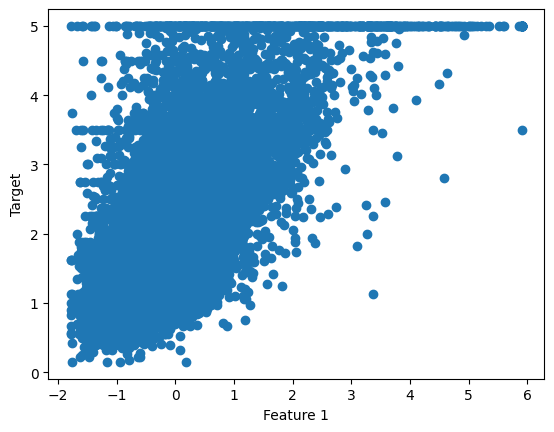

In [48]:
# Step-7: Plotting want to plot one feauture vs target. 
plt.scatter(X_train_scaled[:,0],y_train)
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.show()

##### if x_train is pandas dataframe. 
##### plt.scatter(X_train_scaled['feauture_name'],y_train)

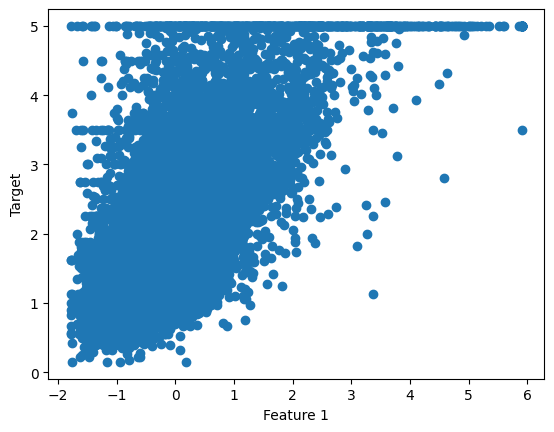

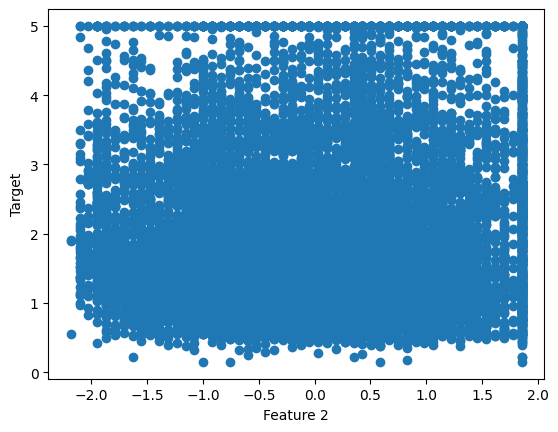

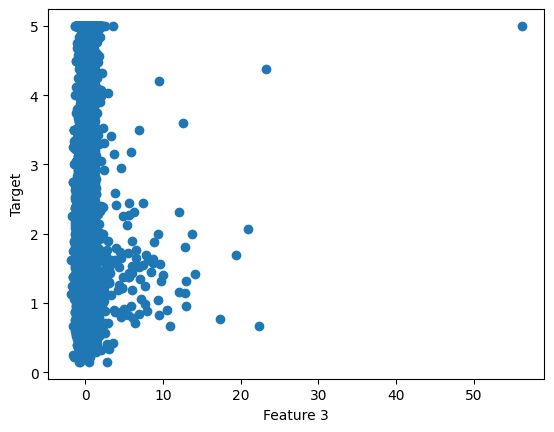

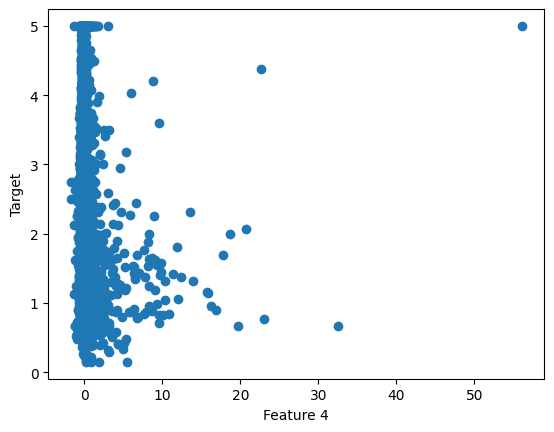

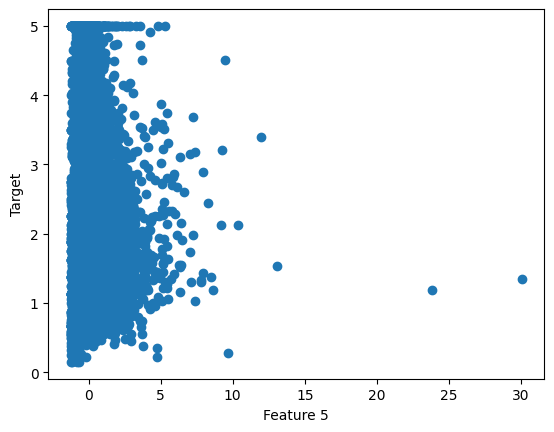

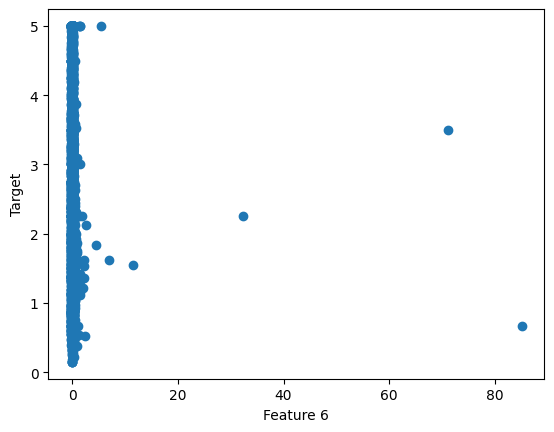

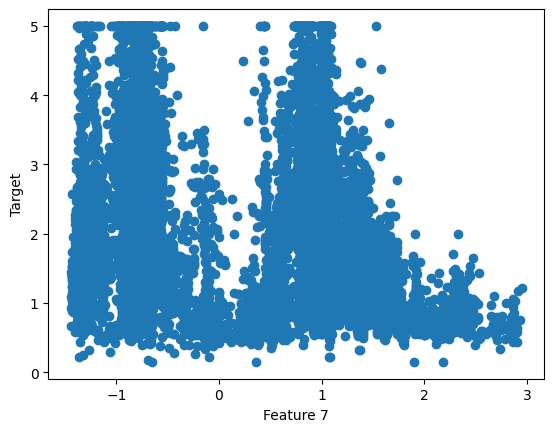

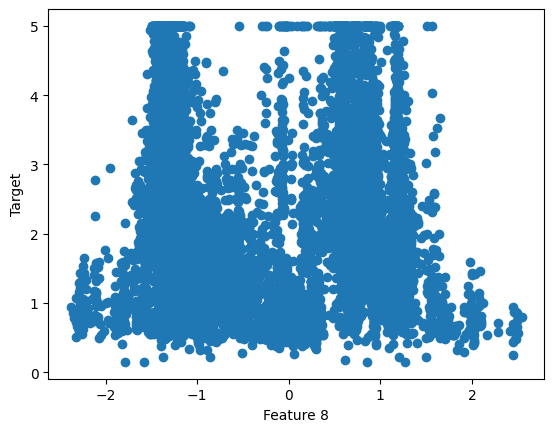

In [51]:
# If you want to check all features vs target: 
for col in range(X_train.shape[1]):
    plt.scatter(X_train_scaled[:,col],y_train) 
    plt.xlabel(f"Feature {col+1}")
    plt.ylabel("Target")
    plt.show()

###  Step-7: Creating best fit line using x_train,y_train. -> error.

##### -> In multiple linear regression, you usually don't plot all features at once with scatter - > instead you use:
#####  -> Heatmap of correlations
#####  -> Pairplot( sns.pairplot)
#####  -. residual plots

#### In multiple linear regression, the regression model is a hyperplane in high-dimensional space, not a simple line you can directlu draw. 

#### That's why you can't really "see" the best fit line if you have more than one feature. 

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


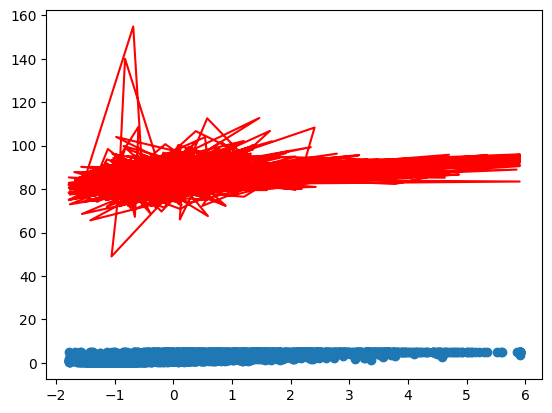

In [52]:
# Step-7: Creating best fit line using x_train,y_train. 
plt.scatter(X_train_scaled[:,0],y_train)
plt.plot(X_train_scaled[:,0],regression.predict(X_train),'r') #after training. 
# X_train_scaled[:,0] --> x-axis(feature values from training set). 
# regressor.predict(X_train) --> predicted y-values(line of best fit). 
# 'r' -> plot the line in red. 

## Ways to visualize the best fit in Multiple Linear Regression:
1.Predicted vs Actual plot(Best practice)
-> This shows how close your predictions are to the real values. 


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


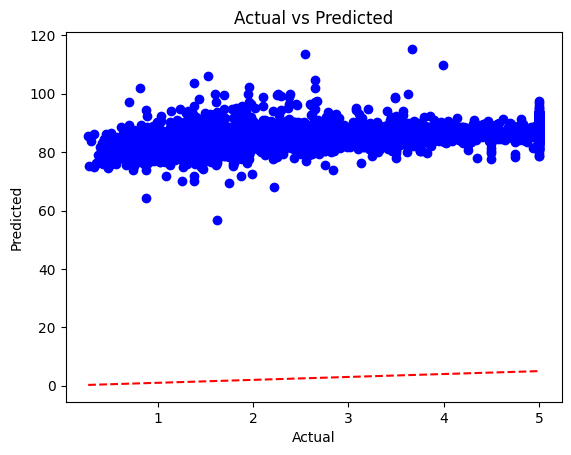

In [ ]:
y_pred = regression.predict(X_test) 
plt.scatter(y_test,y_pred,color="blue")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()
## If points lie close to the red line, the fit is good.   

# plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--') 
# Has twice [y_test.min(),y_test.max()], bcz plt.plot() expects x and y values.
# First argument -> list/array of x-coordinates. 
# second argument -> list/array of y-coordinates. 
# Here, we want a diagonal line from point (min,min) to (max,max). 
# So, we use [y_test.min(),y_test.max()] for both x and y. 
# we write [y_test.min(),y_test.max()] twice to create a diagonal line with-
# slope = 1, showing the ideal perfect predictions.


##### Why do we need this? 
-> This draws a line from the point (min,min) to max(max,max) 

-> which is a 45degree line (perfect prediction line). 

-> If the regression model were perfect: y_pred = y_test. 

-> That means all points would lie on this 45 deg line. 

-> so we plot it as a reference line to visually compare actual vs predicted. 

-> If we didn't repeat it -> this would draw a line from (min,0) to (max,1) -> not a digonal refrence line. 



2.Residual Plot 

Residual = y_test - y_pred.

They should be randomly scattered(no pattern) 

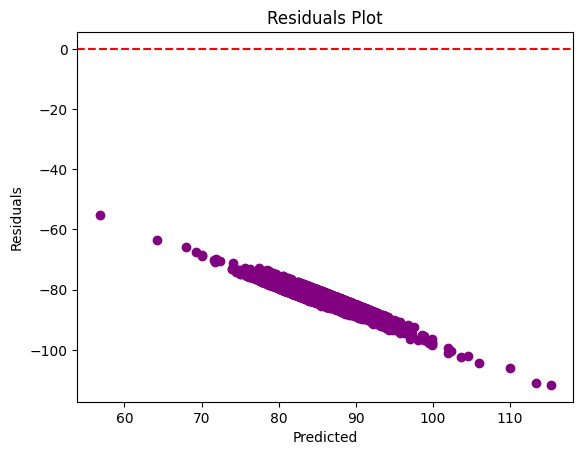

In [56]:
residuals = y_test-y_pred
plt.scatter(y_pred,residuals,color="purple")
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

##### Assumptions of MLR that are important for a good model fit?
-> Linearity

->Independence of errors

->Homoscedasticity

->Normality of errors

->No( or little) multicollinearity. 

->No outliers with extreme influence. 


### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [ ]:
# Step-8: Prediction on  x test data. 
## Prediction for test data
y_pred_test=regressor.predict(X_test) #predicted values model gives for the test features(x_test). 

In [ ]:
y_pred_test

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012], shape=(6812,))

In [ ]:
y_test # The true labels/targets from the test set(ground truth). 

20303    1.674
16966    3.541
10623    1.602
6146     1.408
2208     1.078
         ...  
13490    1.123
9340     3.020
17439    1.724
2602     0.838
7180     1.417
Name: Price, Length: 6812, dtype: float64

## Performance Metrics MAE,MSE,RMSE

In [ ]:
# Step-9: ## Performance Metrics MAE,MSE,RMSE(cost functions). 
## PErformance metrics cost function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

0.552233239936362
0.5371056943007961
0.743123973463622


## Accuracy of the model R squared and Adjusted r ssquared
## R square
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [ ]:
# Step-10: ## Performance Metrics R^2 and Adjusted R^2. 
## R square and Adjusted R square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.5935958526436639


## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [ ]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5931179409607519

In [ ]:
# Step-11: Checking for new data : 
scale_weight = scaler.transform([[80]])
regressor.predict([scale_weight[0]]) #2D array to 1D array . 

In [ ]:
# Step-12: ASSUMPTIONS:  
#1.
plt.scatter(X_test,y_pred_test) # Linear distributed -> very good prediction. 


In [ ]:
#2
residuals = y_test-y_pred_test

In [ ]:
import seaborn as sns 
residuals = y_test-y_pred_test
sns.displot(residuals) # Normal Distributed -> very good prediction. 

In [ ]:
#3
plt.scatter(y_pred_test,residuals) # Uniform distribution -> very good prediction. 


## Pickling
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [ ]:
# Step-13: Pickling the model.(For deployment purpose) 
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regression,open('regressor.pkl','wb'))

In [ ]:
model_regressor=pickle.load(open('regressor.pkl','rb'))
model_regressor.predict(X_test_scaled)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012], shape=(6812,))

In [ ]:
# model_regressor.predict(X_test) & model_regressor.predict(standard_scaler.transform(X_test)) has diff prediction. 
#-> when you train with scaled data, your model learns weights based on those scaled values. 
# -> model_regressor.predict(X_test), without scaling -> you are giving the model raw values it never saw in training. 
# -> Predictions will be wrong (like 161.08467086) .
# -> Instead, you must transform test data with the same scaler used on training: model_regressor.predict(standard_scaler.transform(X_test)).
# -> That gives the correct prediction, becaue now the test data is in the same "scale space" as the training data. 
#correct prediction: 86.16975108. 

# THE GOLDEN RULE:
# 1.Fit scaler on training data.
# 2.Train model on scaled training data.
# 3.Transform test data with the same scaler. (never fit_transform on the test set - only transform). 

In [ ]:
standard_scaler=pickle.load(open('scaler.pkl','rb'))

In [ ]:
model_regressor.predict(standard_scaler.transform(X_test))

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012], shape=(6812,))